In [ ]:
#importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb


In [ ]:
#reading the data from dataset in csv file to a dataframe

In [2]:
dataframe1 = pd.read_csv('C:/Users/yashas/LSProject/dataset_diabetes/diabetic_data.csv')

In [ ]:
#printing existing attributes and count

In [3]:
print dataframe1.columns.values
#dataframe1.head(5)
dataframe1.shape

['encounter_id' 'patient_nbr' 'race' 'gender' 'age' 'weight'
 'admission_type_id' 'discharge_disposition_id' 'admission_source_id'
 'time_in_hospital' 'payer_code' 'medical_specialty' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']


(101766, 50)

In [4]:
#After many iterations these attributes are being removed
#This can be visualised in overview codd

#unique ids, won't contribute to classification
del dataframe1['encounter_id']
del dataframe1['patient_nbr']
del dataframe1['payer_code']

#Higher percentage of missing values
del dataframe1['weight']
del dataframe1['medical_specialty']

#These won't affect the classification as the variance is too low 
del dataframe1['diag_2']
del dataframe1['diag_3']

del dataframe1['repaglinide']
del dataframe1['nateglinide']
del dataframe1['chlorpropamide']
del dataframe1['acetohexamide']
del dataframe1['tolbutamide']
del dataframe1['acarbose']
del dataframe1['miglitol']
del dataframe1['troglitazone']
del dataframe1['tolazamide']
del dataframe1['examide']
del dataframe1['citoglipton']
del dataframe1['glyburide-metformin']
del dataframe1['glipizide-metformin']
del dataframe1['glimepiride-pioglitazone']
del dataframe1['metformin-rosiglitazone']
del dataframe1['metformin-pioglitazone']

print dataframe1.columns.values


['race' 'gender' 'age' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'time_in_hospital' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'number_diagnoses' 'max_glu_serum' 'A1Cresult'
 'metformin' 'glimepiride' 'glipizide' 'glyburide' 'pioglitazone'
 'rosiglitazone' 'insulin' 'change' 'diabetesMed' 'readmitted']


In [5]:
#recoding 0 to No readmission and 1 to <30 or >30 readmission from readmitted attribute - target variable
dataframe1['readmitted'] = pd.Series([0 if val == 'NO' 
                                     else 1
                                     for val in dataframe1['readmitted']])

In [6]:
#binary conversion: Attributes represented with two categories are converted to binary 1/0
#This understanding is obtained by overview code

dataframe1['change'] = pd.Series([0 if val == 'No' 
                                     else 1
                                     for val in dataframe1['change']])
dataframe1['diabetesMed'] = pd.Series([0 if val == 'No' 
                                     else 1
                                     for val in dataframe1['diabetesMed']])

#print(dataframe1['readmitted'])
#'change','diabetesMed',

In [7]:
#Making categorical attribute to binary with 1 for diabetic category and 0 for others
#According to ICD0 codes 250.xx is the format for diabetic and related diseases
dataframe1['diag_1'] = pd.Series([1 if val.startswith('250')
                                 else 0
                                 for val in dataframe1['diag_1']], index = dataframe1.index)

#dataframe1['diag_1']

In [8]:
#Square root transformation to reduce effects of extreme values
dataframe1['number_outpatient'] = dataframe1['number_outpatient'].apply(lambda x:np.sqrt(x+0.5))
dataframe1['number_inpatient'] = dataframe1['number_inpatient'].apply(lambda x:np.sqrt(x+0.5))
dataframe1['number_emergency'] = dataframe1['number_emergency'].apply(lambda x:np.sqrt(x+0.5))

#dataframe1['number_inpatient']

In [9]:
#standardisation to have 0 mean and unit variance
scale_attr = ['time_in_hospital',
             'num_lab_procedures','num_procedures','num_medications',
             'number_outpatient','number_emergency','number_inpatient',
             'number_diagnoses']

from sklearn import preprocessing
my_scaler = preprocessing.StandardScaler().fit(dataframe1[scale_attr])
scale_data = my_scaler.transform(dataframe1[scale_attr])

scale_dataframe = pd.DataFrame(data = scale_data, columns = scale_attr, index = dataframe1.index )
dataframe1.drop(scale_attr, axis = 1, inplace = True)
dataframe1 = pd.concat([dataframe1, scale_dataframe], axis = 1)

#dataframe1['number_outpatient']

In [10]:
#converting categorical attributes to numerical i.e., binary attributes
#evquivalent to one hot encoding
cat_attributes = ['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id',
                  'max_glu_serum','A1Cresult',
                  'metformin','glimepiride','glipizide','glyburide','pioglitazone',
                  'rosiglitazone','insulin']

for i in cat_attributes: 
    dataframe1 = pd.get_dummies(dataframe1, prefix = [i], columns = [i])  


In [11]:
dataframe1.to_csv('LSProcessData2.csv')

In [12]:
dataframe1.shape

(101766, 118)

In [13]:
#create concise table to understand the data

data_type = dataframe1.dtypes.values
missing_count = dataframe1.isnull().sum().values

unique_count = []
for attr in dataframe1.columns:
    unique_count.append(dataframe1[attr].unique().shape[0])
    
info ={'Attributes': dataframe1.columns,
       'Attribute_Type': data_type,
       'MissingValue_Count':missing_count,
       'UniqueValue_Count': unique_count
       }
col_names = {'Attributes','Attribute_Type','MissingValue_Count','UniqueValue_Count'}

info_tab = pd.DataFrame(info,columns = col_names)
info_tab

,Attributes,UniqueValue_Count,MissingValue_Count,Attribute_Type
0,diag_1,2,0,int64
1,change,2,0,int64
2,diabetesMed,2,0,int64
3,readmitted,2,0,int64
4,time_in_hospital,14,0,float64
5,num_lab_procedures,118,0,float64
6,num_procedures,7,0,float64
7,num_medications,75,0,float64
8,number_outpatient,39,0,float64
9,number_emergency,33,0,float64


In [ ]:
#above table shows that the data now has numeric data only with float and int format => numeric form

In [14]:
#create x and y

x = dataframe1.drop(['readmitted'], axis = 1)
y = dataframe1['readmitted']

In [ ]:
#y

In [15]:
#split x and y into train test split with 80% of data as train data and 20% as test data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(81412, 117)
(81412L,)
(20354, 117)
(20354L,)


In [ ]:
#x_train.to_csv('TrainX.csv')
#y_train.to_csv('TrainY.csv')
#x_test.to_csv('TestX.csv')
#y_test.to_csv('TestY.csv')

In [ ]:
#Applying dimensionality reduction
#PCA/TruncatedSVD

#from sklearn.decomposition import TruncatedSVD
#from sklearn.decomposition import PCA

#dr = TruncatedSVD()
#dr=PCA()
#dr.fit(x_train)
#dr.fit(x_test)
#x_train=dr.transform(x_train)
#x_test=dr.transform(x_test)


In [ ]:
#CLASSIFIER ALGORITHMS without applying Dimensinality Reduction

In [18]:
#MLP classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
model = mlp.fit(x_train,y_train) 
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score 
#using accuracy metric because my data balanced- overview code 
MLPAccuracy = accuracy_score(y_test, pred) 
print("Neural Network MLP Accuracy:",MLPAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'weighted') 
print("F1Score:",F1score)



('Neural Network MLP Accuracy:', 0.62759162818119285)
('F1Score:', 0.62448169999434644)


In [19]:
#Perceptron
from sklearn.linear_model import Perceptron

per = Perceptron()
model = per.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
PerAccuracy = accuracy_score(y_test, pred)
print("Perceptron Accuracy:",PerAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'weighted') 
print("F1Score:",F1score)

#from sklearn.metrics import confusion_matrix 
#print(confusion_matrix(y_test, pred))


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


('Perceptron Accuracy:', 0.57851036651272481)
('F1Score:', 0.56878301743942983)


In [20]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model=lr.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
LRAccuracy = accuracy_score(y_test, pred)
print("LR Accuracy:",LRAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'weighted') 
print("F1Score:",F1score)



('LR Accuracy:', 0.63353640562051683)
('F1Score:', 0.62592068973879256)


In [21]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model = nb.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
GNBAccuracy = accuracy_score(y_test, pred)
print("Naive base Accuracy:",GNBAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'micro') 
print("F1Score:",F1score)


('Naive base Accuracy:', 0.4869313157118994)
('F1Score:', 0.4869313157118994)


In [22]:
#Decision Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
DTAccuracy = accuracy_score(y_test, pred)
print("Decision Tree Accuracy:",DTAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'micro') 
print("F1Score:",F1score)

('Decision Tree Accuracy:', 0.55821951459172647)
('F1Score:', 0.55821951459172647)


In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
RFAccuracy = accuracy_score(y_test, pred)
print("Random Forest Accuracy:",RFAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'micro') 
print("F1Score:",F1score)



('Random Forest Accuracy:', 0.60504077822541025)
('F1Score:', 0.60504077822541025)


In [81]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
model = bag.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
BagAccuracy = accuracy_score(y_test, pred)
print("Bagging Accuracy:",BagAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'micro') 
print("F1Score:",F1score)

('Bagging Accuracy:', 0.59742556745602826)
('F1Score:', 0.59742556745602826)


In [27]:
#ExtraTrees
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
model = et.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
ETAccuracy = accuracy_score(y_test, pred)
print("Extra Trees Accuracy:",ETAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'micro') 
print("F1Score:",F1score)


('Extra Trees Accuracy:', 0.59983295666699421)
('F1Score:', 0.59983295666699421)


In [84]:
#combining Bagging classifier and decision tree
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

com = BaggingClassifier(tree.DecisionTreeClassifier())
model = com.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
comAccuracy = accuracy_score(y_test, pred)
print("Combined Accuracy:",comAccuracy)

from sklearn.metrics import f1_score
F1score = f1_score(y_test, pred, average= 'micro') 
print("F1Score:",F1score)


('Combined Accuracy:', 0.60012773901935734)
('F1Score:', 0.60012773901935734)


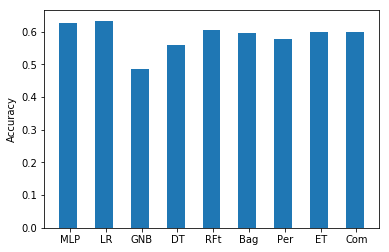

In [85]:
#plot and compare scores 

x_axis = np.arange(9)
y_axis = [MLPAccuracy , LRAccuracy,
          GNBAccuracy, DTAccuracy, RFAccuracy,
          BagAccuracy,  PerAccuracy, ETAccuracy,comAccuracy]

pt.bar(x_axis, y_axis, width=0.5)
pt.xticks(x_axis+0.5/10.,('MLP','LR',
           'GNB','DT','RFt',
            'Bag','Per','ET','Com'))
pt.ylabel('Accuracy')

pt.show()

In [67]:
#Cross_validation - 5 folds
from sklearn.cross_validation import cross_val_score

MLP_score = cross_val_score(mlp, x_train, y_train, cv=5).mean()
LR_score = cross_val_score(lr, x_train, y_train, cv=5).mean()
RF_score = cross_val_score(rf, x_train, y_train, cv=5).mean()


In [68]:
print('MLP cross validation score', MLP_score)
print('LR cross validation score', LR_score)
print('RF cross validation score', RF_score)

('MLP cross validation score', 0.61965070538713352)
('LR cross validation score', 0.6361960365948669)
('RF cross validation score', 0.60310519388355321)


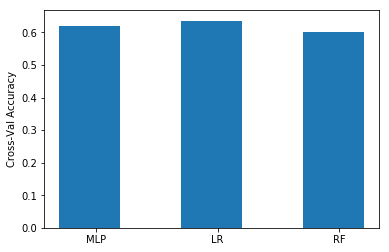

In [32]:
#Plot graph

x_axis = np.arange(3)
y_axis = [MLP_score, LR_score, RF_score]

pt.bar(x_axis, y_axis, width=0.5)
pt.xticks(x_axis+0.5/10.,('MLP','LR','RF'))
pt.ylabel('Cross-Val Accuracy')

pt.show()

In [33]:
#Cross Validation - 10 fold

#Cross_validation
from sklearn.cross_validation import cross_val_score

MLP_score = cross_val_score(mlp, x_train, y_train, cv=10).mean()
print('MLP cross validation score', MLP_score)

LR_score = cross_val_score(lr, x_train, y_train, cv=10).mean()
print('Logistic Regression cross validation score', LR_score)

RF_score = cross_val_score(rf, x_train, y_train, cv=10).mean()
print('Random Forest cross validation score', RF_score)


('MLP cross validation score', 0.62274595376846631)
('Logistic Regression cross validation score', 0.63620836707826811)
('Random Forest cross validation score', 0.60319119591143688)


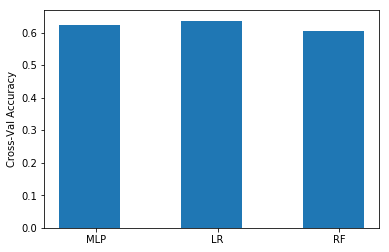

In [35]:
#Plot graph

x_axis = np.arange(3)
y_axis = [MLP_score, LR_score, RF_score]

pt.bar(x_axis, y_axis, width=0.5)
pt.xticks(x_axis+0.5/10.,('MLP','LR','RF'))
pt.ylabel('Cross-Val Accuracy')

pt.show()

In [ ]:
#Tweeking top 3 resulting classifiers
#Parameter turning using GridSerachCV

In [40]:
#MLPClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters ={"solver":['sgd'],
            "hidden_layer_sizes":(15,),
            "random_state":[1]}
            
mlpg = MLPClassifier()
grid_m = GridSearchCV(mlpg,parameters,cv=10,scoring='accuracy')
grid_m.fit(x_train, y_train)
print('MLP:')
print(grid_m.best_score_)


MLP:
0.638357981624


In [41]:
#Random Forest
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={
            'min_samples_split':[5,10],
            'min_samples_leaf':[3,5],
            'max_depth':[10,15],
            'max_leaf_nodes':[20,40]
}

rfg = RandomForestClassifier()
grid_r = GridSearchCV(rfg,parameters,cv=10,scoring='accuracy')
grid_r.fit(x_train, y_train)
print('RF:')
print(grid_r.best_score_)


RF:
0.631921584042


In [45]:
#LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

c_range = np.arange(0.1, 3.2, 0.2)
parameters = dict(C = c_range)

lrg = LogisticRegression()
grid_l = GridSearchCV(lrg,parameters,cv=5,scoring='accuracy')
grid_l.fit(x_train, y_train)
print('LR:')
print(grid_l.best_score_)

LR:
0.636355819781


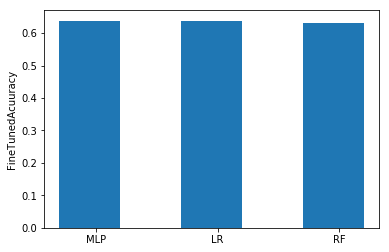

In [75]:
#Plot graph

x_axis = np.arange(3)
y_axis = [grid_m.best_score_, grid_l.best_score_, grid_r.best_score_]

pt.bar(x_axis, y_axis, width=0.5)
pt.xticks(x_axis+0.5/10.,('MLP','LR','RF'))
pt.ylabel('FineTunedAcuuracy')

pt.show()

In [ ]:
#Make prediction for test class with the tuned model

In [88]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('MLP Classifier Result:')
pred_MLP = grid_m.predict(x_test)
mlpa = metrics.accuracy_score(y_test,pred_MLP)
print('Prediction Accuracy')
print(mlpa)
print('Report')
print(classification_report(y_test,pred_MLP))
print('Confusion Matrix')
print(confusion_matrix(y_test, pred_MLP))

print('********************************************************************')
print('Random Forest Result:')
pred_RF = grid_r.predict(x_test)
rfa = metrics.accuracy_score(y_test,pred_RF)
print('Prediction Accuracy')
print(rfa)
print('Report')
print(classification_report(y_test,pred_RF))
print('Confusion Matrix')
print(confusion_matrix(y_test, pred_RF))
print('********************************************************************')
print('Logistic Regression Result')
pred_LR = grid_l.predict(x_test)
lra = metrics.accuracy_score(y_test,pred_LR)
print('Prediction Accuracy')
print(lra)
print('Report')
print(classification_report(y_test,pred_LR))
print('Confusion Matrix')
print(confusion_matrix(y_test, pred_LR))

MLP Classifier Result:
Prediction Accuracy
0.640218138941
Report
             precision    recall  f1-score   support

          0       0.65      0.73      0.69     10952
          1       0.63      0.53      0.58      9402

avg / total       0.64      0.64      0.64     20354

Confusion Matrix
[[8039 2913]
 [4410 4992]]
********************************************************************
Random Forest Result:
Prediction Accuracy
0.627100324261
Report
             precision    recall  f1-score   support

          0       0.62      0.81      0.70     10952
          1       0.65      0.42      0.51      9402

avg / total       0.63      0.63      0.61     20354

Confusion Matrix
[[8829 2123]
 [5467 3935]]
********************************************************************
Logistic Regression Result
Prediction Accuracy
0.633634666405
Report
             precision    recall  f1-score   support

          0       0.63      0.76      0.69     10952
          1       0.64      0.48      0

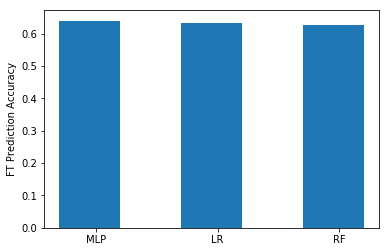

In [76]:
#Plot graph

x_axis = np.arange(3)
y_axis = [mlpa, lra, rfa]

pt.bar(x_axis, y_axis, width=0.5)
pt.xticks(x_axis+0.5/10.,('MLP','LR','RF'))
pt.ylabel('FT Prediction Accuracy')

pt.show()

In [ ]:
#ROC curve
#ROC is a graphical plot which illustrates the performance of a binary 
#classifier system as its discrimination threshold is varied. AUC is the
#percentage of the ROC plot that is underneath the curve. AUC is useful as
#a single number summary of classifier performance.

In [89]:
#store the predicted probablitites for class 1
print('Probability mean for case 1 of readmission')
pred_MLP_prob = grid_m.predict_proba(x_test)[:,1]
print pred_MLP_prob.mean()

Probability mean for case 1 of readmission
0.463541348389


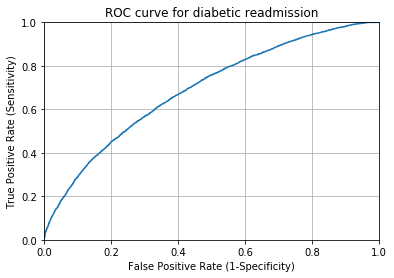

In [90]:
#plot ROC curve

fpr, tpr, threshols = metrics.roc_curve(y_test, pred_MLP_prob)
pt.plot(fpr, tpr)

pt.xlim([0.0,1.0])
pt.ylim([0.0,1.0])

pt.title('ROC curve for diabetic readmission')

pt.xlabel('False Positive Rate (1-Specificity)')
pt.ylabel('True Positive Rate (Sensitivity)')

pt.grid(True)
pt.show()

In [77]:
#AUC score
print('ROC AUC score')
mlp_auc = metrics.roc_auc_score(y_test,pred_MLP_prob )
print(mlp_auc)

ROC AUC score
0.69169210497


In [78]:
#grid_r.predict(x_test)
pred_RF_prob_ = grid_r.predict_proba(x_test)[:,1]
print('Probability mean for case 1')
print pred_RF_prob_.mean()
print('ROC AUC score')
rf_auc = metrics.roc_auc_score(y_test,pred_RF_prob_ )
print(rf_auc)

Probability mean for case 1
0.460174945147
ROC AUC score
0.678563802963


In [79]:
#grid_l.predict(x_test)
pred_LR_prob_ = grid_l.predict_proba(x_test)[:,1]
print('Probability mean for case 1')
print pred_LR_prob_.mean()
print('ROC AUC score')
lr_auc = metrics.roc_auc_score(y_test,pred_LR_prob_ )
print(lr_auc)

Probability mean for case 1
0.461596520274
ROC AUC score
0.686342554286


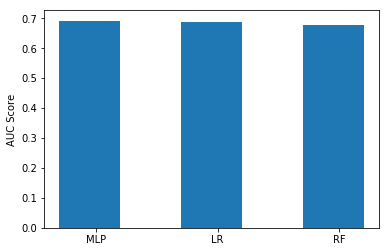

In [80]:
#Plot graph

x_axis = np.arange(3)
y_axis = [mlp_auc, lr_auc, rf_auc]

pt.bar(x_axis, y_axis, width=0.5)
pt.xticks(x_axis+0.5/10.,('MLP','LR','RF'))
pt.ylabel('AUC Score')

pt.show()

In [91]:
#Deriving the most important features affecting classification

# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(x_test.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print 'Top 10 features are: '
for feature in feature_names_sort[::-1][:10]:
    print feature

Top 10 features are: 
num_lab_procedures
num_medications
time_in_hospital
number_inpatient
number_diagnoses
num_procedures
number_outpatient
number_emergency
gender_Female
gender_Male
